In [0]:
#!pip install fix_yahoo_finance
#!pip install pandas_datareader
#!pip install pandas
#!pip install fbprophet
#!pip install matplotlib
#!pip install plotly

In [53]:
from pandas_datareader import data as pdr
import pandas as pd  
import numpy as np  
from fbprophet import Prophet
import matplotlib.pyplot as plt
import datetime as dt
from pandas.core import datetools
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")


def retrieve_data(ticker, start_date, end_date):
    data = pdr.get_data_yahoo(ticker, start=start_date, end=end_date)
    
    return data
  
plt.style.use("seaborn-whitegrid")

In [54]:
stock = retrieve_data("SPY", "2000-01-01", "2018-09-25")
stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2005-09-27,21.400000,19.100000,21.049999,19.299999,961200.0,18.540155
2005-09-28,20.530001,19.200001,19.299999,20.500000,5747900.0,19.692907
2005-09-29,20.580000,20.100000,20.400000,20.209999,1078200.0,19.414324
2005-09-30,21.049999,20.180000,20.260000,21.010000,3123300.0,20.182831
2005-10-03,21.750000,20.900000,20.900000,21.500000,1057900.0,20.653534


In [55]:
stock.describe()

,High,Low,Open,Close,Volume,Adj Close
count,3272.000000,3272.000000,3272.000000,3272.000000,3.272000e+03,3272.000000
mean,27.199691,26.212485,26.718148,26.700083,7.470338e+06,25.937451
std,17.759333,17.322693,17.547016,17.544536,5.995691e+06,17.162823
min,2.030000,1.450000,1.810000,1.760000,1.385000e+05,1.690708
25%,9.260000,8.790000,9.040000,9.020000,3.907325e+06,8.664880
50%,29.630000,28.600000,29.100000,29.139999,6.434100e+06,28.002356
75%,43.312499,42.020000,42.700001,42.624999,9.571850e+06,41.529508
max,63.270000,62.000000,62.700001,62.950001,1.377672e+08,60.471634


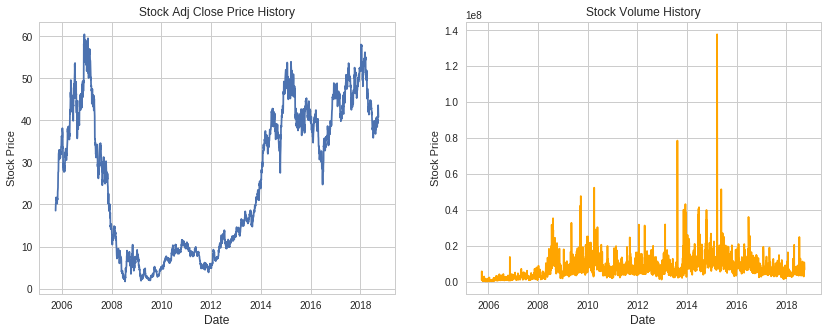

In [56]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.plot(stock["Adj Close"])
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Stock Adj Close Price History")

ax2.plot(stock["Volume"], color="orange")
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Stock Price")
ax2.set_title("Stock Volume History")
plt.show()

In [57]:
m = Prophet(daily_seasonality=True)
m.add_seasonality(name='monthly', period=30.5, fourier_order=8)
#m.add_seasonality(name='weekly', period=7, fourier_order=3)

stock['Date'] = stock.index
ph_df = stock.drop(['Open', 'High', 'Low', 'Volume', 'Close'], axis=1)
ph_df.rename(columns={'Date': 'ds', 'Adj Close': 'y'}, inplace=True)

ph_df.head()

,y,ds
Date,,
2005-09-27,18.540155,2005-09-27
2005-09-28,19.692907,2005-09-28
2005-09-29,19.414324,2005-09-29
2005-09-30,20.182831,2005-09-30
2005-10-03,20.653534,2005-10-03


In [58]:
m.fit(ph_df)

In [59]:
# Create Future dates
future_prices = m.make_future_dataframe(periods=365)

# Predict Prices
forecast = m.predict(future_prices)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3632,2019-09-21,50.558433,41.580537,59.262202
3633,2019-09-22,50.269061,40.947412,59.266420
3634,2019-09-23,50.729349,41.396982,60.253053
3635,2019-09-24,50.988246,41.640012,59.774688
3636,2019-09-25,51.300591,42.026864,60.048392


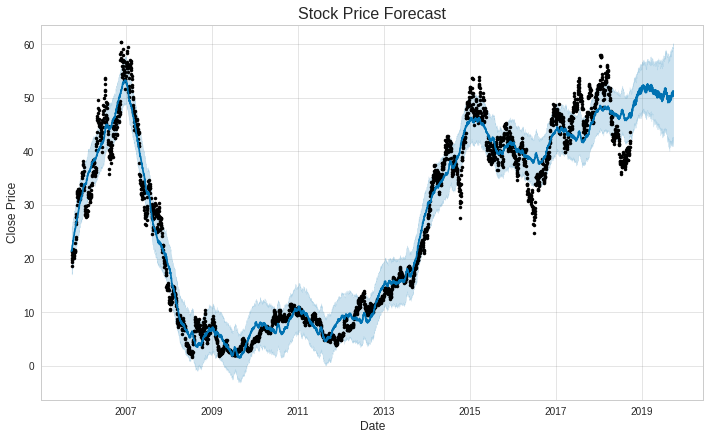

In [60]:
import matplotlib.dates as mdates

# Dates
starting_date = dt.datetime(2018, 4, 7)
starting_date1 = mdates.date2num(starting_date)
trend_date = dt.datetime(2018, 6, 7)
trend_date1 = mdates.date2num(trend_date)

pointing_arrow = dt.datetime(2018, 2, 18)
pointing_arrow1 = mdates.date2num(pointing_arrow)

# Learn more Prophet tomorrow and plot the forecast for amazon.
fig = m.plot(forecast)
ax1 = fig.add_subplot(111)
ax1.set_title("Stock Price Forecast", fontsize=16)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Close Price", fontsize=12)

plt.show()

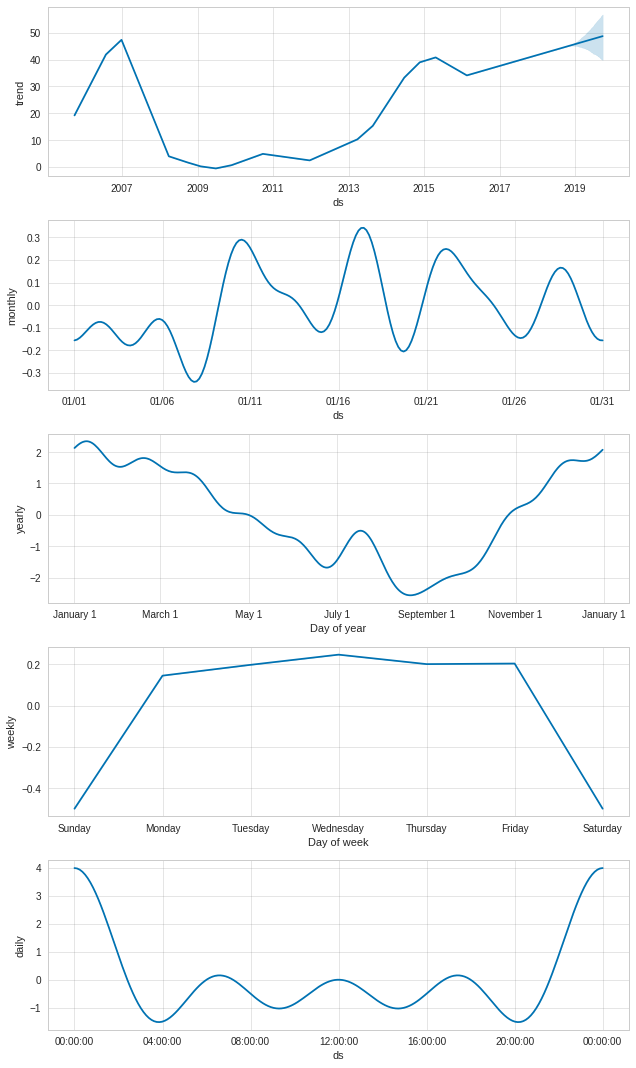

In [61]:
fig2 = m.plot_components(forecast)
plt.show()